Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2012 - loss: -295373376.0000 - val_accuracy: 0.2208 - val_loss: -1351063040.0000
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1942 - loss: -2350451968.0000 - val_accuracy: 0.2208 - val_loss: -5465643520.0000
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1850 - loss: -8893651968.0000 - val_accuracy: 0.2208 - val_loss: -17731145728.0000
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1965 - loss: -25966075904.0000 - val_accuracy: 0.2208 - val_loss: -44565114880.0000
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1988 - loss: -60378505216.0000 - val_accuracy: 0.2208 - val_loss: -91283406848.0000
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1904 - loss: -120030314496.0000 - val_accuracy: 0.2208 - val_loss: -163884449792.0000
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1930 - loss: -204131745792.0000 - val_accuracy: 0.2

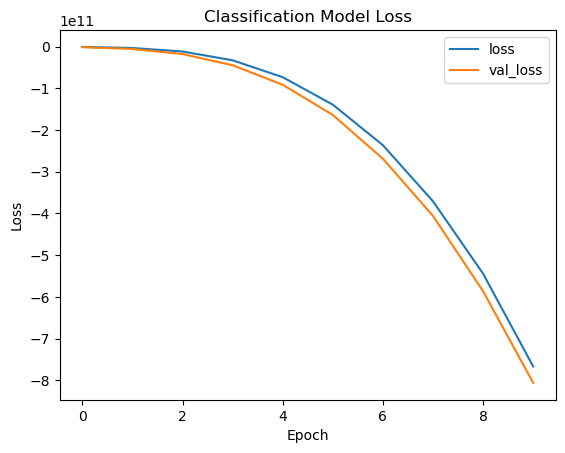

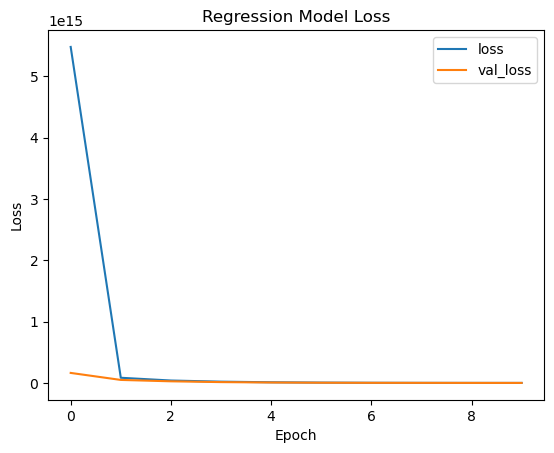

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


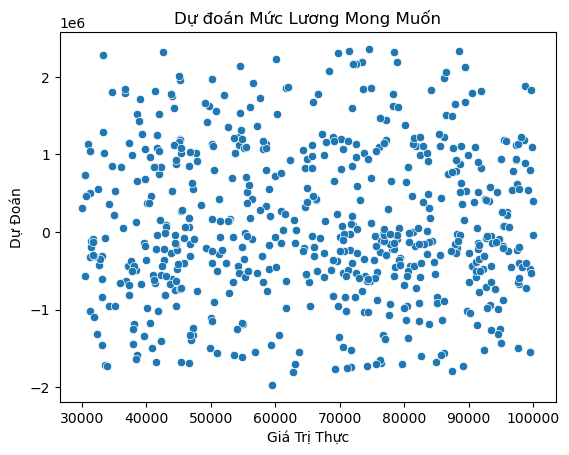

In [25]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
data = pd.read_csv("clean_recruitment_data.csv")  # Thay đổi tên file nếu cần

# Xử lý dữ liệu
def preprocess_data(data):
    # Chuyển đổi ngày tháng thành số (tính bằng giây)
    for col in ['Application Date', 'Date of Birth']:
        data[col] = pd.to_datetime(data[col]).astype(np.int64) // 10**9

    # Mã hóa các biến phân loại
    le = LabelEncoder()
    categorical_cols = ['First Name', 'Last Name', 'Gender', 'Email', 
                        'City', 'State', 'Country', 'Education Level', 
                        'Job Title', 'Status']
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])
    
    return data

data = preprocess_data(data)

# Tách dữ liệu thành đầu vào và đầu ra
X = data.drop(['Applicant ID', 'Desired Salary', 'Status', 'Address'], axis=1)  # Loại bỏ cột Address
y_classification = data['Status'].astype(np.int8)  # Chuyển đổi sang kiểu int8
y_regression = data['Desired Salary'].astype(np.float32)  # Chuyển đổi sang kiểu float32

# Chia dữ liệu
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42
)

# Đảm bảo rằng tất cả các đầu vào đều là kiểu số
# Chuyển đổi X_train và X_test sang dạng mảng NumPy
X_train = X_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)

# Chuyển đổi các nhãn sang định dạng NumPy
y_train_class = y_train_class.values.astype(np.int8)
y_test_class = y_test_class.values.astype(np.int8)
y_train_reg = y_train_reg.values.astype(np.float32)
y_test_reg = y_test_reg.values.astype(np.float32)

# Hàm xây dựng mô hình phân loại
def build_classification_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Mô hình phân loại
classification_model = build_classification_model((X_train.shape[1],))
classification_history = classification_model.fit(X_train, y_train_class, epochs=10, validation_split=0.2)

# Lưu mô hình phân loại
classification_model.save('classification_model.keras')

# Hàm xây dựng mô hình hồi quy
def build_regression_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Mô hình hồi quy
regression_model = build_regression_model((X_train.shape[1],))
regression_history = regression_model.fit(X_train, y_train_reg, epochs=10, validation_split=0.2)

# Lưu mô hình hồi quy
regression_model.save('regression_model.keras')

# Trực quan hóa mô hình
def plot_model_history(history, title='Model Loss'):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_model_history(classification_history, title='Classification Model Loss')
plot_model_history(regression_history, title='Regression Model Loss')

# Dự đoán và trực quan hóa
predictions_class = classification_model.predict(X_test).flatten()  # Flatten cho dạng 1D
predictions_reg = regression_model.predict(X_test).flatten()

# So sánh với giá trị thực cho hồi quy
sns.scatterplot(x=y_test_reg, y=predictions_reg)
plt.title('Dự đoán Mức Lương Mong Muốn')
plt.xlabel('Giá Trị Thực')
plt.ylabel('Dự Đoán')
plt.show()
